<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/ALL_COMPUTATIONAL_SUBSTRATES_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
%load_ext autoreload
%autoreload 2   

In [3]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap





## Substrates combined, xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>All features</a></li>
    <li><a href=#2>Feature subsets</a></li>
 </ol>


## All features<a name='1'>
<a href=#outline>Home</a>

In [4]:
## Read in the data 
import pandas as pd 

In [5]:
data_neil_comp=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_neil_comp=data_neil_comp[~data_neil_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_neil_comp=format_for_xgboost(data_neil_comp)
#random.seed(1234)
train_split2,eval_split2,test_split2=split_train_test_eval_by_mut_pos(data_neil_comp[~data_neil_comp['mut_pos'].isna()])
null_mut_pos=data_neil_comp[data_neil_comp['mut_pos'].isna()]
train_split2=pd.concat((train_split2,null_mut_pos),axis=0)

train_split2['dataset']="NEIL1_COMP"
eval_split2['dataset']="NEIL1_COMP"
test_split2['dataset']="NEIL1_COMP"

(434, 202)
{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 21, 57.0: 15, 58.0: 33}


In [6]:
data_ttyh2_comp=pd.read_csv("../../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_ttyh2_comp=data_ttyh2_comp[~data_ttyh2_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ttyh2_comp=format_for_xgboost(data_ttyh2_comp)
#random.seed(1234)
train_split4,eval_split4,test_split4=split_train_test_eval_by_mut_pos(data_ttyh2_comp[~data_ttyh2_comp['mut_pos'].isna()])
null_mut_pos=data_ttyh2_comp[data_ttyh2_comp['mut_pos'].isna()]
train_split4=pd.concat((train_split4,null_mut_pos),axis=0)

train_split4['dataset']="TTYH2_COMP"
eval_split4['dataset']="TTYH2_COMP"
test_split4['dataset']="TTYH2_COMP"



(601, 205)
{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


In [7]:
data_ajuba=pd.read_csv("../../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)

#remove any null editing level values 
data_ajuba=data_ajuba[~data_ajuba["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ajuba=format_for_xgboost(data_ajuba)
#random.seed(1234)
train_split5,eval_split5,test_split5=split_train_test_eval_by_mut_pos(data_ajuba[~data_ajuba['mut_pos'].isna()])
null_mut_pos=data_ajuba[data_ajuba['mut_pos'].isna()]
train_split5=pd.concat((train_split5,null_mut_pos),axis=0)

train_split5['dataset']="AJUBA"
eval_split5['dataset']="AJUBA"
test_split5['dataset']="AJUBA"


(482, 195)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 44}


In [8]:
train_split=pd.concat([train_split2,train_split4,train_split5])
eval_split=pd.concat([eval_split2,eval_split4,eval_split5])
test_split=pd.concat([test_split2,test_split4,test_split5])

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [9]:
train_dataset=train_split['dataset']
eval_dataset=eval_split['dataset']
test_dataset=test_split['dataset']

In [10]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [11]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [12]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append('dataset')
print("\n".join(to_drop))

d2_5prm_cp_hairpin
u1_distance
d2_3prm_cp_bulge:G:U
d2_length_bulge
u3_5prm_cp_hairpin
d2_length_hairpin
u2_5prm_cp_hairpin:G:C
u2_length_hairpin
d2_5prm_cp_bulge:A:U
mut_type:mismatch
mut_next_struct:E
u1_struct:B
site_5prm_cp_bulge:U:G
u2_5prm_cp_hairpin:U:A
site_3prm_cp_bulge:G:U
u3_5prm_cp_internal:U:A
d1_length_internal_ecs
d3_3prm_cp_internal
u1_3prm_cp_internal
site_5prm_cp_hairpin:U:A
u3_3prm_cp_internal
u3_3prm_cp_internal:G:C
site_5prm_cp_hairpin:C:G
u2_5prm_cp_internal:A:U
site_length_hairpin
mut_prev_struct:E
d1_5prm_cp_bulge
site_3prm_cp_bulge:C:G
site_5prm_cp_bulge:G:U
u2_5prm_cp_bulge:U:A
u3_length_hairpin
u1_exist
u2_5prm_cp_hairpin:U:G
u2_5prm_cp_hairpin:A:U
d3_length_internal_es
u3_3prm_cp_internal:U:A
site_5prm_cp_internal:G:C
d3_3prm_cp_bulge:G:C
d2_5prm_cp_bulge:U:A
site_length_stem
d1_length_internal_es
site_5prm_cp_internal:U:A
u1_length_internal_ecs
d2_struct:S
d2_3prm_cp_bulge:U:G
site_next_struct:B
d2_length_stem
site_length_bulge
u3_5prm_cp_bulge
site_5prm_cp

In [13]:
#remove teh features that don't change across isoforms , or are null for all isoforms
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [14]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [15]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(1002, 133)
(1002,)
(197, 133)
(197,)
(261, 133)
(261,)


In [16]:
train_X

,minimum_free_energy,ensemble_free_energy,mfe_frequency,ensemble_diversity,sim_nor_score,probability_active_conf,num_mutations,mut_pos,mut_site_dist,mut_ref_nt:A,...,u1_struct:I,u1_5prm_cp_internal:U:A,u2_struct:S,u2_3prm_cp_bulge:U:A,u2_3prm_cp_internal:A:U,u2_3prm_cp_internal:C:G,u2_3prm_cp_internal:U:A,u3_struct:I,u3_5prm_cp_internal:G:C,d2_3prm_cp_bulge:G:C
0,-40.1,-41.29,0.143877,29.39,0.7426,0.137610,1,41.0,-6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-40.8,-41.45,0.346702,8.25,0.7400,0.169233,1,45.0,-2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-39.6,-40.44,0.256179,5.33,0.9853,0.123298,1,49.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-39.4,-40.32,0.225684,5.99,0.9859,0.107908,1,50.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-45.2,-45.88,0.330998,4.09,0.9911,0.321958,1,52.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,-70.2,-71.47,0.126827,2.89,0.9164,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
998,-65.9,-67.48,0.076642,6.67,0.9393,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
999,-65.6,-67.22,0.071944,5.66,0.9259,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,-65.6,-67.22,0.071774,5.83,0.9310,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [18]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['rmse']#['aucpr','auc','mae','map','rmse']

In [19]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [20]:
num_round = 1000
#random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-rmse:0.29747	train-rmse:0.27697
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.22351	train-rmse:0.20039
[2]	eval-rmse:0.17146	train-rmse:0.14769
[3]	eval-rmse:0.13782	train-rmse:0.11048
[4]	eval-rmse:0.11953	train-rmse:0.08650
[5]	eval-rmse:0.10562	train-rmse:0.06880
[6]	eval-rmse:0.09912	train-rmse:0.05690
[7]	eval-rmse:0.09166	train-rmse:0.04721
[8]	eval-rmse:0.08757	train-rmse:0.04169
[9]	eval-rmse:0.08551	train-rmse:0.03656
[10]	eval-rmse:0.08390	train-rmse:0.03366
[11]	eval-rmse:0.08225	train-rmse:0.03230
[12]	eval-rmse:0.08202	train-rmse:0.03021
[13]	eval-rmse:0.08103	train-rmse:0.02964
[14]	eval-rmse:0.08042	train-rmse:0.02809
[15]	eval-rmse:0.08078	train-rmse:0.02720
[16]	eval-rmse:0.08013	train-rmse:0.02593
[17]	eval-rmse:0.08029	train-rmse:0.02505
[18]	eval-rmse:0.07999	train-rmse:0.02424
[19]	eval-rmse:0.07885	train-rmse:0.02307
[20]	eval-rmse:0.07849	tr

In [21]:
# save to binary file for faster loading
bst.save_model('ratio.combined.substrates.model')
# save model to text file 
bst.dump_model('ratio.combined.substrates.txt')


In [22]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [23]:
## get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred)

Train
	Spearman corr : SpearmanrResult(correlation=0.9995555008842629, pvalue=0.0)
	Pearson corr : (0.9999590151751988, 0.0)
	MAE : 0.0011279262886199147
	MAPE : 0.019207141875113663
	RMSE : 0.0016623986110322828
	auPRC : 1.0
	auROC : 0.9999999999999999
Eval
	Spearman corr : SpearmanrResult(correlation=0.8802619603700992, pvalue=4.731947313684976e-65)
	Pearson corr : (0.9256476375152953, 3.069255447339233e-84)
	MAE : 0.03860281862634197
	MAPE : 0.6006448772087821
	RMSE : 0.07451656732384769
	auPRC : 0.9137659597992716
	auROC : 0.9889069264069265
Test
	Spearman corr : SpearmanrResult(correlation=0.86871697175198, pvalue=5.349982843573915e-81)
	Pearson corr : (0.8630446562410473, 8.692817342649689e-79)
	MAE : 0.04759027411745882
	MAPE : 0.6850045709742927
	RMSE : 0.07893874943553016
	auPRC : 0.6153872740163062
	auROC : 0.9629482071713147


In [24]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.13481943
6.361509234618518
1.6263761283982516
The R-square of the test data is  0.744 



In [25]:
## get performance on Neil1 subset 
from helpers import * 
cur_split="NEIL1_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.5,
                                   outf='Neil1.txt')
print(train_y[train_subset].shape)
print(eval_y[eval_subset].shape)
print(test_y[test_subset].shape)

Train
	Spearman corr : SpearmanrResult(correlation=0.9990160108817776, pvalue=0.0)
	Pearson corr : (0.9999697170825497, 0.0)
	MAE : 0.001236418462505467
	MAPE : 0.010299051467189168
	RMSE : 0.001890244537460209
	auPRC : 0.9999999999999998
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9240250248818568, pvalue=7.685428122986746e-29)
	Pearson corr : (0.9406628777762294, 3.2436069885774373e-32)
	MAE : 0.05708461710029462
	MAPE : 0.33364461697373493
	RMSE : 0.0886297063106668
	auPRC : 0.9234302938722077
	auROC : 0.9658385093167702
Test
	Spearman corr : SpearmanrResult(correlation=0.8882927260907957, pvalue=5.767279462557576e-23)
	Pearson corr : (0.8591343794252683, 5.429910936318864e-20)
	MAE : 0.0833137800693512
	MAPE : 1.0722959481424936
	RMSE : 0.11413149922234257
	auPRC : 0.6669063779357897
	auROC : 0.9199999999999999
(285,)
(67,)
(65,)


In [26]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals= test_y[test_subset]-test_pred[test_subset]
y_test_mean = np.mean(test_pred[test_subset])
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y[test_subset]-y_test_mean)*(test_y[test_subset]-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.21691
3.128921437939299
0.8466899424580725
The R-square of the test data is  0.729 



In [74]:
## get performance on TTYH2 subset 
from helpers import * 
cur_split="TTYH2_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.2,
                                   outf='ttyh2.txt')
print(train_y[train_subset].shape)
print(eval_y[eval_subset].shape)
print(test_y[test_subset].shape)

Train
	Spearman corr : SpearmanrResult(correlation=0.9997929285279956, pvalue=0.0)
	Pearson corr : (0.99992480785727, 0.0)
	MAE : 0.0010959393148118923
	MAPE : 0.012921004727902287
	RMSE : 0.0016095130311577477
	auPRC : 0.9999634903249363
	auROC : 0.9999758541591212
Eval
	Spearman corr : SpearmanrResult(correlation=0.8234064547369607, pvalue=2.1277597215248268e-16)
	Pearson corr : (0.7307306034064666, 1.5626904966834166e-11)
	MAE : 0.042171374864050086
	MAPE : 1.1509972269434594
	RMSE : 0.09082569345662649
	auPRC : 0.5153042708925062
	auROC : 0.9134615384615384
Test
	Spearman corr : SpearmanrResult(correlation=0.7785009119882246, pvalue=1.4621774603853727e-22)
	Pearson corr : (0.7757855384023017, 2.5399096636081257e-22)
	MAE : 0.05494203192847115
	MAPE : 0.8262388939221297
	RMSE : 0.08095212171461587
	auPRC : 0.8652445739317408
	auROC : 0.9005102040816326
(416,)
(62,)
(105,)


In [28]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals= test_y[test_subset]-test_pred[test_subset]
y_test_mean = np.mean(test_pred[test_subset])
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y[test_subset]-y_test_mean)*(test_y[test_subset]-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.16588263
1.720908955095964
0.6880908310602883
The R-square of the test data is  0.6 



In [29]:
## get performance on AJUBA subset 
from helpers import * 
cur_split="AJUBA"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.07,
                                   outf='ajuba.txt')
print(train_y[train_subset].shape)
print(eval_y[eval_subset].shape)
print(test_y[test_subset].shape)

Train
	Spearman corr : SpearmanrResult(correlation=0.9958156486254531, pvalue=9.2674761638e-313)
	Pearson corr : (0.9997286368283521, 0.0)
	MAE : 0.001069409051233718
	MAPE : 0.036329529979759544
	RMSE : 0.0014954226159085535
	auPRC : 0.9992063492063492
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.6684103220302479, pvalue=4.717594765059484e-10)
	Pearson corr : (0.8319706273167298, 1.5192906349729273e-18)
	MAE : 0.017139127677919423
	MAPE : 0.36192681474110805
	RMSE : 0.028730116322226284
	auPRC : 0.7977651515151514
	auROC : 0.893103448275862
Test
	Spearman corr : SpearmanrResult(correlation=0.8988949430514303, pvalue=1.1936422822634685e-33)
	Pearson corr : (0.8551473789143844, 3.947388474046656e-27)
	MAE : 0.013590686677576423
	MAPE : 0.24540519267257868
	RMSE : 0.03172605177637915
	auPRC : 1.0
	auROC : 1.0
(301,)
(68,)
(91,)


In [30]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals= test_y[test_subset]-test_pred[test_subset]
y_test_mean = np.mean(test_pred[test_subset])
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y[test_subset]-y_test_mean)*(test_y[test_subset]-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.04034118
0.21965531665262733
0.09159535487989166
The R-square of the test data is  0.583 



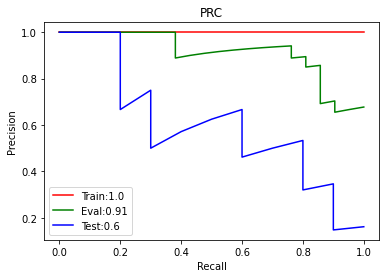

In [31]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

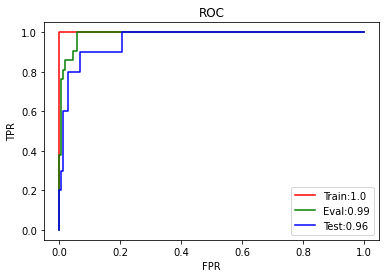

In [32]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

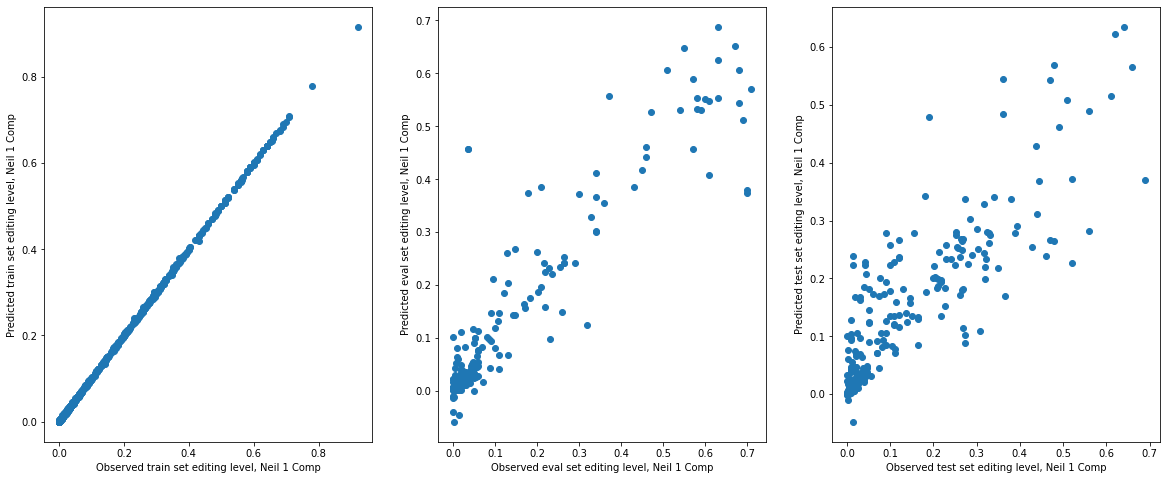

In [33]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Comp")
plt.ylabel("Predicted train set editing level, Neil 1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Comp")
plt.ylabel("Predicted eval set editing level, Neil 1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Comp")
plt.ylabel("Predicted test set editing level, Neil 1 Comp")

plt.show()

In [34]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':test_dataset})

In [35]:
test_df['Dataset'].unique()

array(['NEIL1_COMP', 'TTYH2_COMP', 'AJUBA'], dtype=object)

In [36]:
(test_df[test_df['Dataset']=="NEIL1_COMP"]).shape

(65, 3)

In [37]:
(test_df[test_df['Dataset']=="TTYH2_COMP"]).shape

(105, 3)

In [38]:
(test_df[test_df['Dataset']=="AJUBA"]).shape

(91, 3)

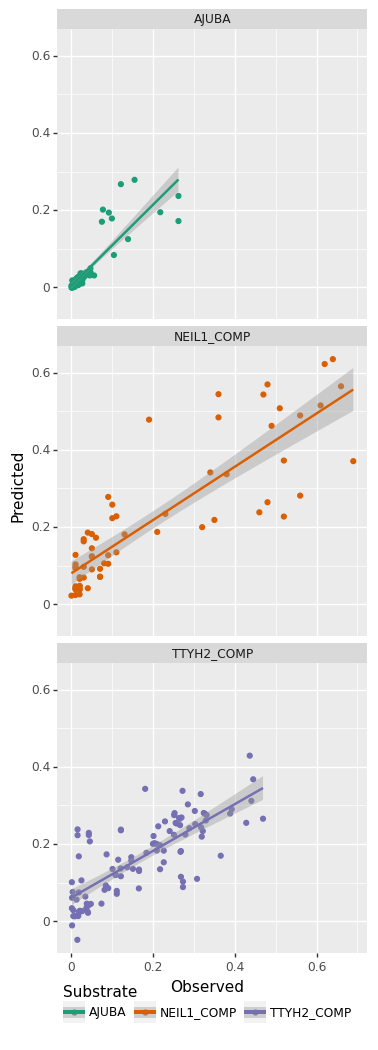

<ggplot: (8734907613089)>


In [39]:
plotnine.options.figure_size = (4, 12)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#1b9e77','#d95f02','#7570b3'],name="Substrate")
 + facet_wrap('~Dataset',ncol=1,nrow=3)
 + theme(legend_position="bottom"))

print(p)
ggsave(plot=p, filename='all.comp.substrates.pdf',format='pdf',width=4,height=12,units='in')


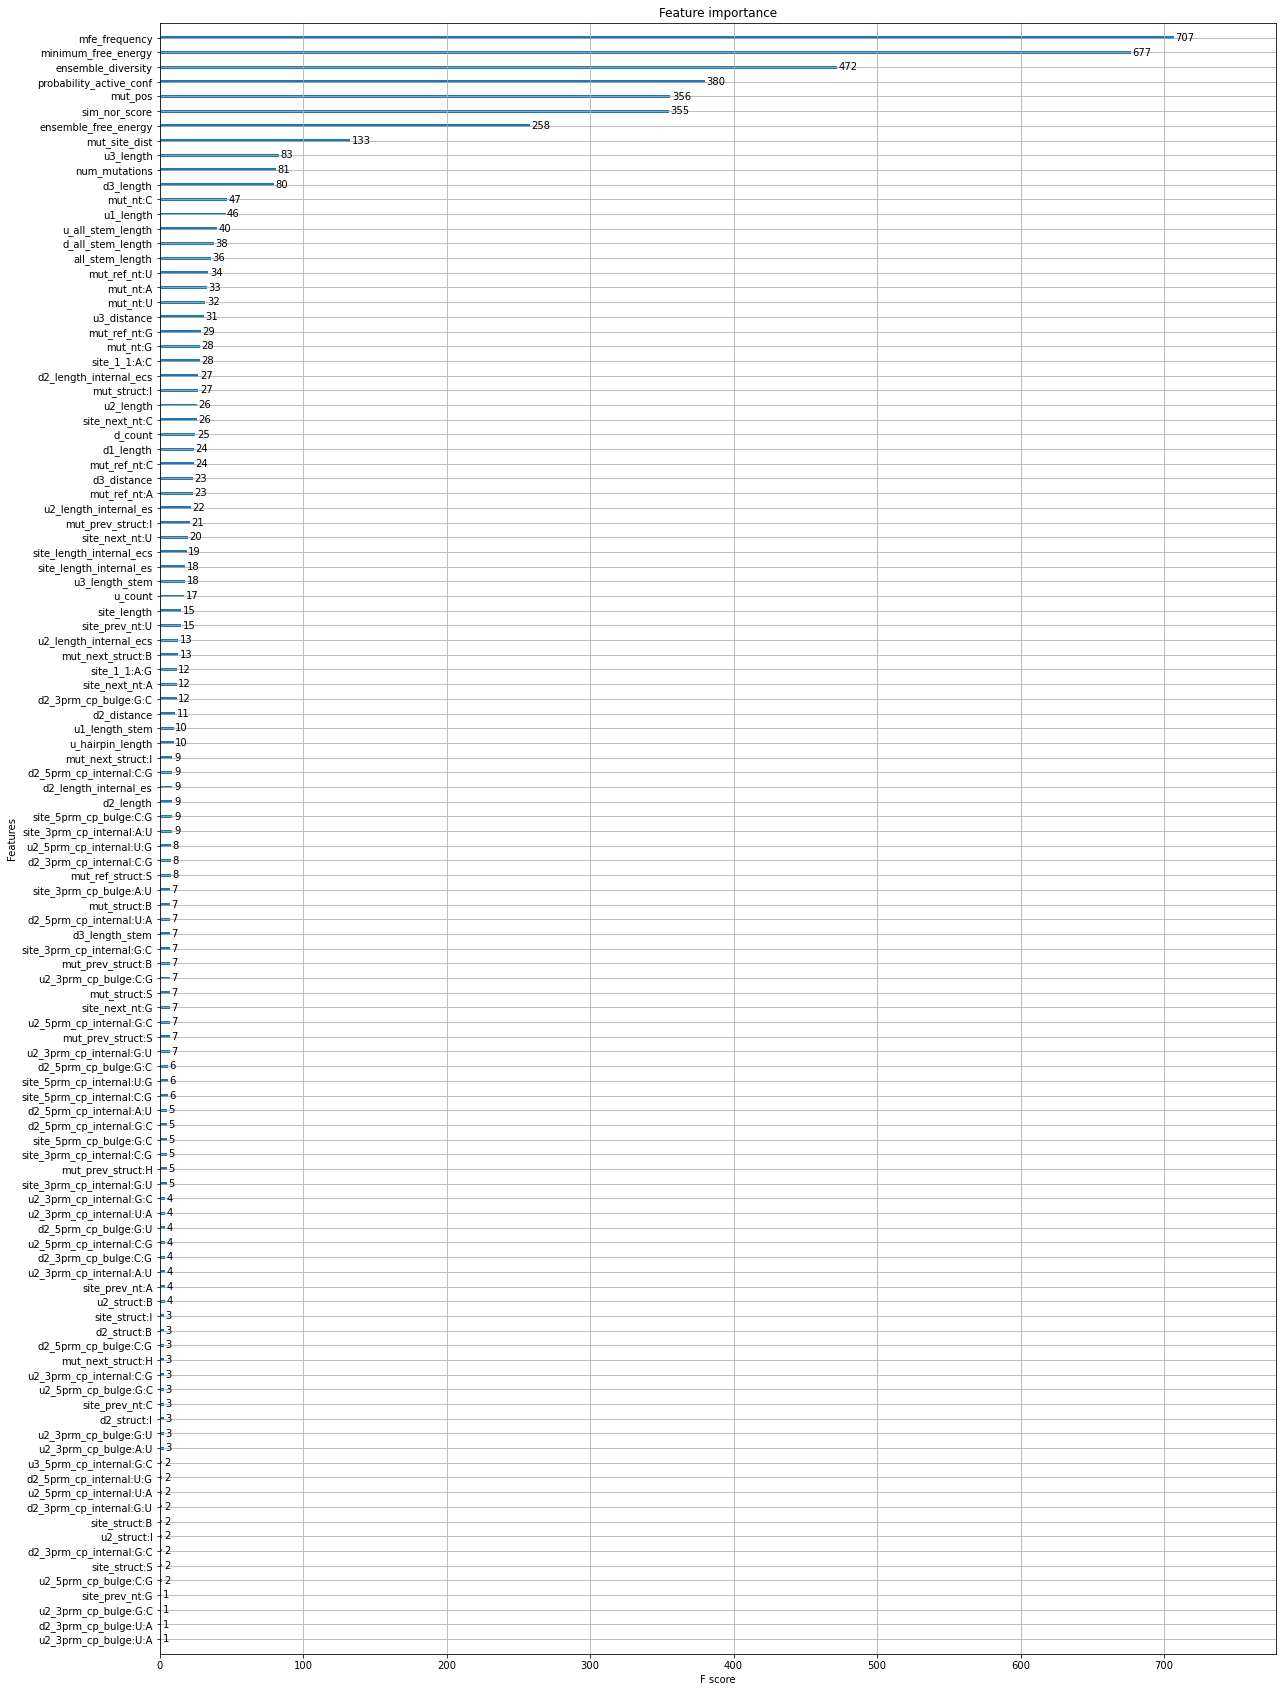

In [40]:
matplotlib.rcParams['figure.figsize'] = [20, 30]
xgboost.plot_importance(bst)

In [41]:
#xgboost.to_graphviz(bst, num_trees=2)


In [42]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)

#concatenate train, test, validate 
data_x=pd.concat([train_X,eval_X,test_X])
data_y=pd.concat([train_y,eval_y,test_y])
data_names=pd.concat([train_dataset,eval_dataset,test_dataset])
data_x.reset_index(inplace=True, drop=True) 
data_y.reset_index(inplace=True,drop=True)
data_names.reset_index(inplace=True,drop=True)



In [43]:
data_x_neil1=data_x[data_names=="NEIL1_COMP"]
data_y_neil1=data_y[data_names=="NEIL1_COMP"]
data_x_neil1.reset_index(inplace=True, drop=True) 
data_y_neil1.reset_index(inplace=True,drop=True)

data_x_ttyh2=data_x[data_names=="TTYH2_COMP"]
data_y_ttyh2=data_y[data_names=="TTYH2_COMP"]
data_x_ttyh2.reset_index(inplace=True, drop=True) 
data_y_ttyh2.reset_index(inplace=True,drop=True)

data_x_ajuba=data_x[data_names=="AJUBA"]
data_y_ajuba=data_y[data_names=="AJUBA"]
data_x_ajuba.reset_index(inplace=True, drop=True) 
data_y_ajuba.reset_index(inplace=True,drop=True)


In [44]:
shap_values_neil1 = explainer.shap_values(data_x_neil1)
shap_values_ttyh2 = explainer.shap_values(data_x_ttyh2)
shap_values_ajuba = explainer.shap_values(data_x_ajuba)
shap_values = explainer.shap_values(test_X)


In [45]:
max(data_y_neil1)

0.92

In [46]:
min(data_y_neil1)


0.0

In [47]:
max(data_y_ttyh2)

0.6559999999999999

In [48]:
min(data_y_ttyh2)

0.0

In [49]:
max(data_y_ajuba)

0.4235

In [50]:
min(data_y_ajuba)

0.0

0.92
0.0


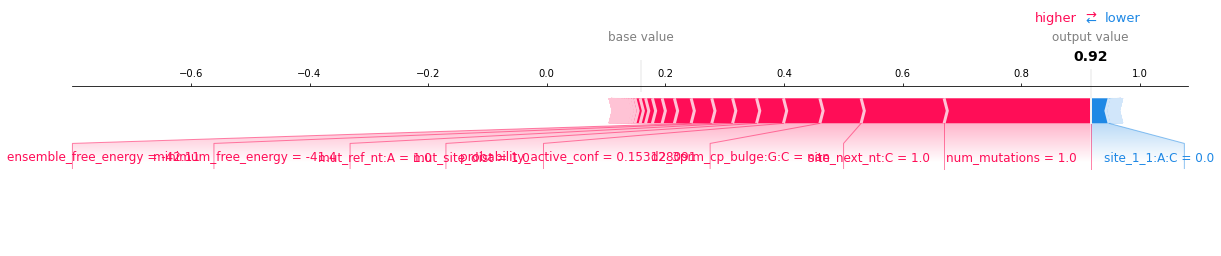

In [51]:
###### Max and min editing level Neil 1
max_index=data_y_neil1.index[data_y_neil1 == max(data_y_neil1)]
min_index=data_y_neil1.index[data_y_neil1 == min(data_y_neil1)]
print(max(data_y_neil1))
print(min(data_y_neil1))
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_neil1[max_index,:], data_x_neil1.iloc[max_index,:],matplotlib=True,show=False)
plt.savefig("neil1.max.joint.forceplot.pdf",format='pdf',height=1,width=7,bbox_inches="tight",dpi=300)


In [52]:
min_index[0]

334

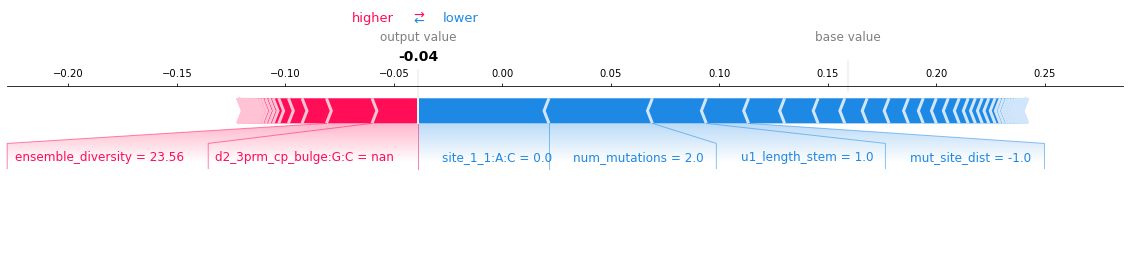

In [53]:
shap.force_plot(explainer.expected_value, shap_values_neil1[min_index[0],:], data_x_neil1.iloc[min_index[0],:],matplotlib=True,show=False)
plt.savefig("neil1.min.joint.forceplot.pdf",format='pdf',height=1,width=7,bbox_inches="tight",dpi=300)

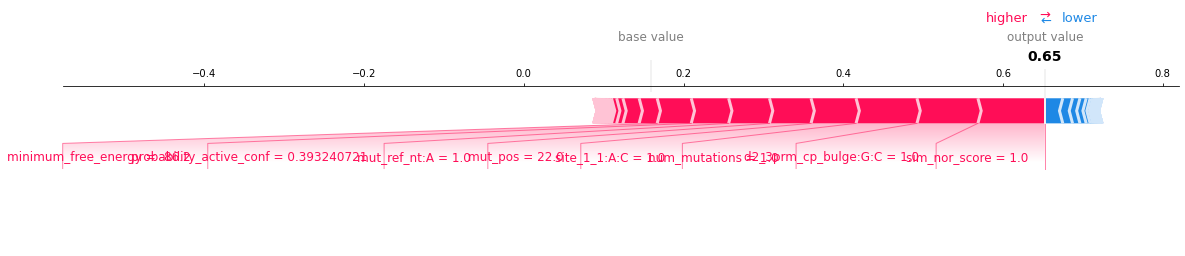

In [54]:
## Max and min editing level TTYH2
max_index=data_y_ttyh2.index[data_y_ttyh2 == max(data_y_ttyh2)]
min_index=data_y_ttyh2.index[data_y_ttyh2 == min(data_y_ttyh2)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ttyh2[max_index,:], data_x_ttyh2.iloc[max_index,:],matplotlib=True,show=False)
plt.savefig("ttyh2.max.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

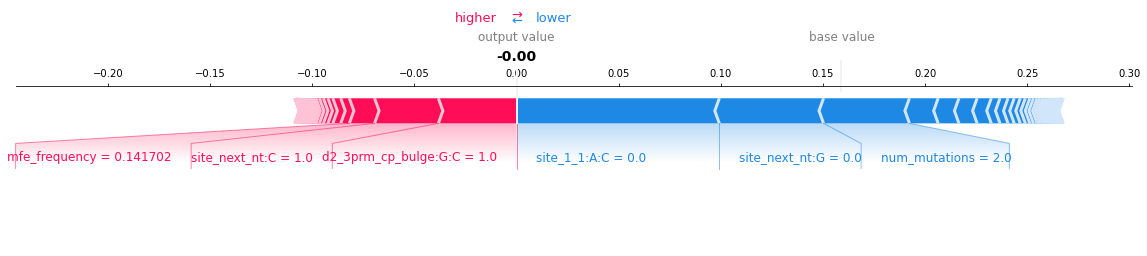

In [55]:
shap.force_plot(explainer.expected_value, shap_values_ttyh2[min_index[0],:], data_x_ttyh2.iloc[min_index[0],:],matplotlib=True,show=False)
plt.savefig("ttyh2.min.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

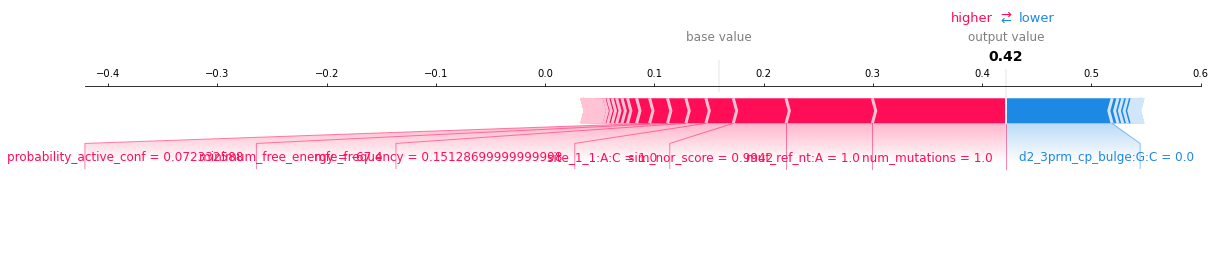

In [56]:
## Max and min editing level AJUBA
max_index=data_y_ajuba.index[data_y_ajuba == max(data_y_ajuba)]
min_index=data_y_ajuba.index[data_y_ajuba == min(data_y_ajuba)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ajuba[max_index,:], data_x_ajuba.iloc[max_index,:],matplotlib=True, show=False)
plt.savefig("ajuba.max.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

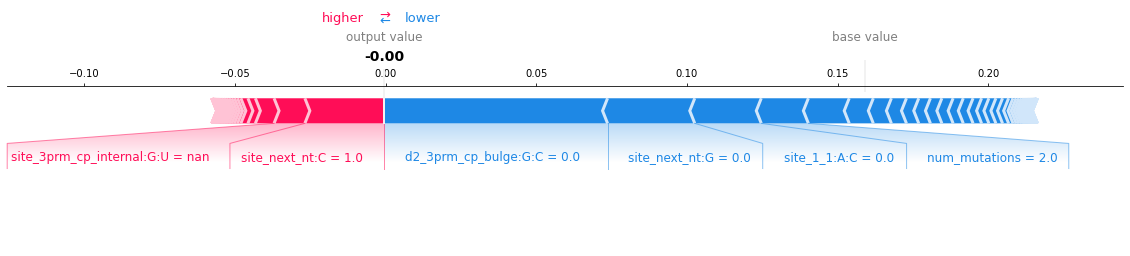

In [57]:
shap.force_plot(explainer.expected_value, shap_values_ajuba[min_index[0],:], data_x_ajuba.iloc[min_index[0],:],matplotlib=True, show=False)
plt.savefig("ajuba.min.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

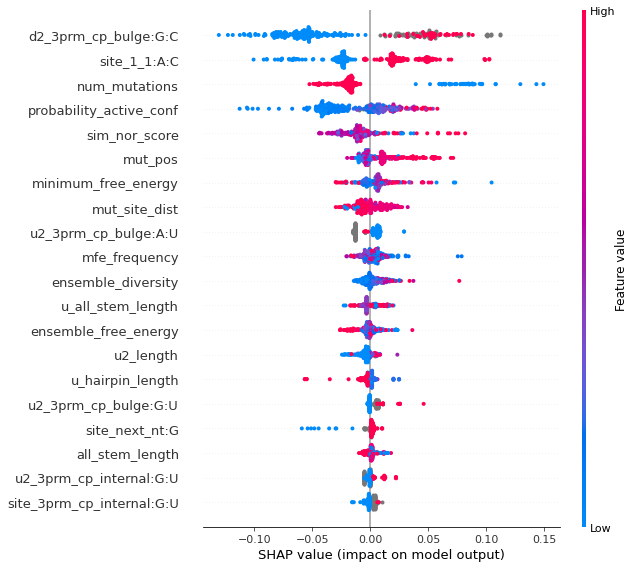

In [58]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X,show=False)
plt.savefig("all.comp.shap.pdf", format='pdf',width=8,height=10,dpi=300,bbox_inches="tight")

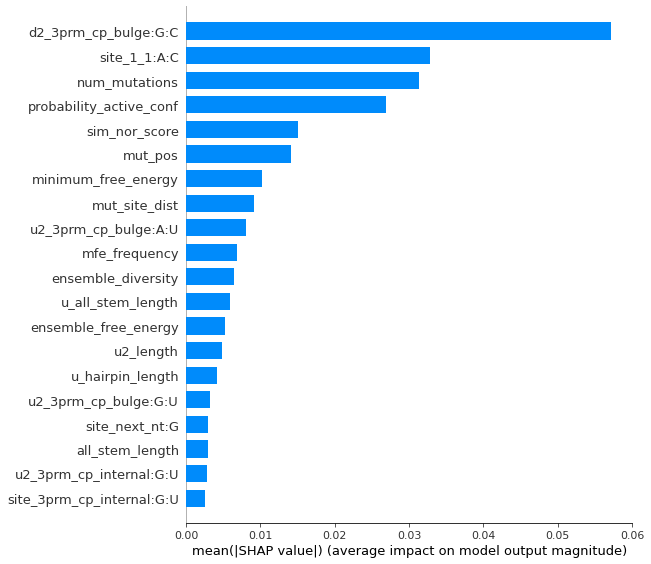

In [59]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, data_x, plot_type="bar")

In [60]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(data_x)
shap_interaction_values.shape

(1460, 133, 133)

In [61]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [62]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [63]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


## Feature subset<a name='2'>
<a href=#outline>Home</a>

In [64]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

In [65]:
shap_values.head()

,minimum_free_energy,ensemble_free_energy,mfe_frequency,ensemble_diversity,sim_nor_score,probability_active_conf,num_mutations,mut_pos,mut_site_dist,mut_ref_nt:A,...,u1_struct:I,u1_5prm_cp_internal:U:A,u2_struct:S,u2_3prm_cp_bulge:U:A,u2_3prm_cp_internal:A:U,u2_3prm_cp_internal:C:G,u2_3prm_cp_internal:U:A,u3_struct:I,u3_5prm_cp_internal:G:C,d2_3prm_cp_bulge:G:C
0,0.004619,-0.003088,-0.016879,0.007096,-0.036019,-0.001042,0.084652,-0.005968,0.023421,-0.001312,...,0.0,0.0,0.0,-0.000032,-0.000400,-0.000034,0.000014,0.0,-8.011155e-07,0.050129
1,0.020044,0.000685,0.075563,0.018959,-0.018475,-0.001531,0.085019,0.002293,0.024990,-0.001362,...,0.0,0.0,0.0,-0.000032,-0.000399,-0.000030,0.000008,0.0,-7.110269e-07,0.084665
2,0.000803,0.005126,0.006173,0.011957,0.067083,0.026810,0.078083,-0.005666,0.004329,-0.001794,...,0.0,0.0,0.0,-0.000018,0.008588,-0.000035,-0.000029,0.0,-8.553151e-07,0.103291
3,-0.003334,-0.006335,-0.002972,0.005624,-0.044291,-0.000132,0.082627,-0.003227,0.017811,-0.000715,...,0.0,0.0,0.0,-0.000032,0.000519,-0.000034,0.000014,0.0,-8.277186e-07,0.050454
4,0.011957,0.000099,-0.005111,0.013971,-0.037369,0.011034,0.077714,-0.003752,0.026083,-0.000711,...,0.0,0.0,0.0,-0.000032,-0.000621,-0.000034,0.000032,0.0,-7.916308e-07,0.055797


In [66]:
from feature_subsets import * 
subset_names=["no_num_mutations","mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [no_num_mutations, mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  #print(subset)
  cur_features=list(set(filter_features(shap_values,subset)))
  print(len(list(set(cur_features))))
  cur_feature_shap=shap_values[cur_features].values 
  print(cur_feature_shap.shape)
  cur_feature_data_X=test_X[cur_features]
  #shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

132
(261, 132)
Contribution/Total:0.8960168
24
(261, 24)
Contribution/Total:0.21860033
30
(261, 30)
Contribution/Total:0.16332069
40
(261, 40)
Contribution/Total:0.145625
32
(261, 32)
Contribution/Total:0.22827834
72
(261, 72)
Contribution/Total:0.37390333
54
(261, 54)
Contribution/Total:0.38192102
92
(261, 92)
Contribution/Total:0.82996243
100
(261, 100)
Contribution/Total:0.73356473
22
(261, 22)
Contribution/Total:0.14297234
8
(261, 8)
Contribution/Total:0.020348322
14
(261, 14)
Contribution/Total:0.10258296
22
(261, 22)
Contribution/Total:0.122931294
107
(261, 107)
Contribution/Total:0.7373683
7
(261, 7)
Contribution/Total:0.22563744


In [67]:
subset_names
subset_contribs

[0.8960168,
 0.21860033,
 0.16332069,
 0.145625,
 0.22827834,
 0.37390333,
 0.38192102,
 0.82996243,
 0.73356473,
 0.14297234,
 0.020348322,
 0.10258296,
 0.122931294,
 0.7373683,
 0.22563744]

In [68]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [69]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 


In [70]:
subset_contrib_df.to_csv('subset_contrib.txt',mode='a',sep='\t')

In [71]:
from pandas.api.types import CategoricalDtype
from plotnine.data import mpg

In [72]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)


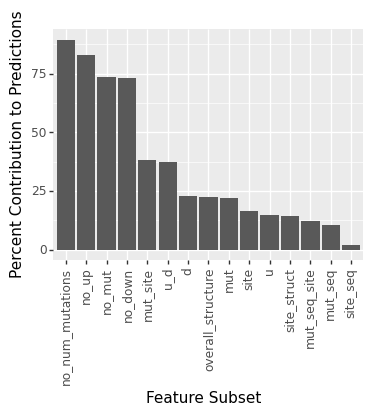

<ggplot: (8734880243169)>

In [73]:
plotnine.options.figure_size = (4, 3)
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + theme(axis_text_x=element_text(angle=90))
 + ylab("Percent Contribution to Predictions"))
ggsave(plot=p, filename='all.comp.subset.importance.pdf',device='pdf',width=5,height=4,units='in')
p